In [28]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Basic Perceptron
Below code reprsents working of a perceptron (with 1 Nueron) using **Gradient Descent Algorithm**.

<img src="Basic_Preceptron.png">

## Gradient Descent Explained (Maths)
### Simple Linear Equation

$\hat{y} = w_1x_1 + w_2x_2$

### Cost

$C = \frac{1}{2}(y - \hat{y})^2$

$C = \frac{1}{2}(y - w_1x_1 - w_2x_2)^2$

### Getting Gradients
$\frac{dC}{dw_1} = \frac{1}{2}*2(y - w_1x_1 - w_2x_2)(-x_1) $

$\frac{dC}{dw_2} = \frac{1}{2}*2(y - w_1x_1 - w_2x_2)(-x_2) $
### Updating weights
$w_1 \to w_1 - lr*\frac{dC}{dw_1} $  where : lr is learning rate or step size

$w_2 \to w_2 - lr*\frac{dC}{dw_2}$

### Calculate new $\hat{y}$ using new weights
$\hat{y} = w_1x_1 + w_2x_2$

**Repeat the above process till we reach global minima of cost function i.e. minimum cost.**


## Basic Neuron - solve single equation

Below is toy model working to solve 1 equation. Single equation can have infinite solutions. The below model acheive 1 solution by achieving lowest cost.

Solutions will change based on initial value of weights. 

Try changin initial weights and see if you get different solutions.

In [99]:
def nn(x,y,w1,w2,lr,n_epochs):
    cost_list = []
    for epoch in range(n_epochs):
        dydw1 = 2*(y-x[0]*w1-x[1]*w2)*(-x[0]) # or dydw1 = 2*(y-np.dot(x,w))*(-x[0]) 
        dydw2 = 2*(y-x[0]*w1-x[1]*w2)*(-x[1]) # or dydw1 = 2*(y-np.dot(x,w))*(-x[1]) 
        w1 = w1 - lr*dydw1
        w2 = w2 - lr*dydw2
        w = [[w1],[w2]]
        y_hat = np.dot(x,w)
        cost = (y - y_hat)**2
        cost_list.append([w1,w2,cost[0]])
        print("epoch :{:d} w1 :{:f} w2 :{:f} cost:{:f}".format(epoch,w1,w2,cost[0]))
        if cost <= 0.001:
            break

    cost_list = pd.DataFrame(cost_list,columns=['w1','w2','cost'])
    return w1,w2,cost_list

In [100]:
x = [3,8]   
y = 41
w1_init = 0
w2_init = 1
lr = 0.01
n_epochs = 100
w1,w2,cost_list = nn(x,y,w1_init,w2_init,lr,n_epochs)
w = [[w1],[w2]]
print(np.dot(x,w))

epoch :0 w1 :1.980000 w2 :6.280000 cost:230.432400
epoch :1 w1 :1.069200 w2 :3.851200 cost:48.759496
epoch :2 w1 :1.488168 w2 :4.968448 cost:10.317509
epoch :3 w1 :1.295443 w2 :4.454514 cost:2.183185
epoch :4 w1 :1.384096 w2 :4.690924 cost:0.461962
epoch :5 w1 :1.343316 w2 :4.582175 cost:0.097751
epoch :6 w1 :1.362075 w2 :4.632199 cost:0.020684
epoch :7 w1 :1.353446 w2 :4.609188 cost:0.004377
epoch :8 w1 :1.357415 w2 :4.619773 cost:0.000926
[ 41.03043228]


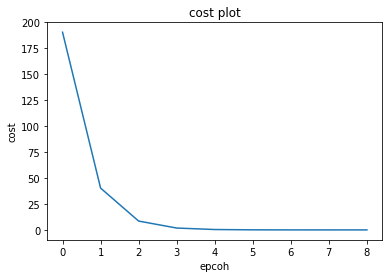

In [91]:
plt.plot(cost_list.cost)
plt.title("cost plot")
plt.xlabel("epcoh")
plt.ylabel("cost")

## Basic Neuron - solve 2 equations

Below model solves two equations. You are sure to get a solution if equations are not parallel. 

Try changing equations and get solutions. 

*Note: Using some matrix operations*

In [91]:
def nn_batch(x,y,w,lr,n_epoch):
    cost_list = []
    y_hat = np.dot(x,w)  # calculate y_hat for first iteration
    for epoch in range(100):
        dcostdw1 = 2*0.5*np.dot(-x[:,0],(y-y_hat))  # matrix multiplication of dcostdw1 = [-x1,-x3] (1x2) * [[y1-y_hat1],[y2-y_hat2]] (2x1) 
        dcostdw2 = 2*0.5*np.dot(-x[:,1],(y-y_hat))  # matrix multiplication of dcostdw2 = [-x2,-x4] (1x2) * [[y1-y_hat1],[y2-y_hat2]] (2x1) 
        w = w - [[lr*dcostdw1[0]],
                 [lr*dcostdw2[0]]]    # w = w (2x1) - dcostdw (2x1)
        y_hat = np.dot(x,w)   # calculate new y_hat using new weights after above steps
        cost = 0.5*np.sum((y - y_hat)**2)  # calculate new cost 
        if epoch%20 ==0:
            print("epoch :{:d} w1 :{:f} w2 :{:f} cost:{:f}".format(epoch,w[0][0],w[1][0],cost))
        cost_list.append([epoch,cost])
        if cost <= 0.0001:
            break

    cost_list = pd.DataFrame(cost_list,columns=['epoch','cost'])
    return w,cost_list


### Solving below equations
\begin{align}
41 = 3a + 8b
\end{align}
\begin{align}
58 = 10a + 7b
\end{align}

Try using other equations

In [92]:
x = np.array([[3,8],
             [10,7]])
y = np.array([[41],[58]])
lr = 0.001
w = np.ones((x.shape[1],1))
lr = 0.001
n_epoch=100

w,cost_list = nn_batch(x,y,w,lr,n_epoch)
print "y_hat_final:\n{:s}".format(np.dot(x,w))

epoch :0 w1 :1.500000 w2 :1.527000 cost:816.856688
epoch :20 w1 :3.313861 w2 :3.652681 cost:1.937421
epoch :40 w1 :3.236858 w2 :3.767721 cost:0.934306
epoch :60 w1 :3.168311 w2 :3.835227 cost:0.470979
epoch :80 w1 :3.119503 w2 :3.883013 cost:0.237421
y_hat_final:
[[ 40.58297367]
 [ 58.27165518]]


### Plot cost wrt epochs
cost goes down with each epoch 

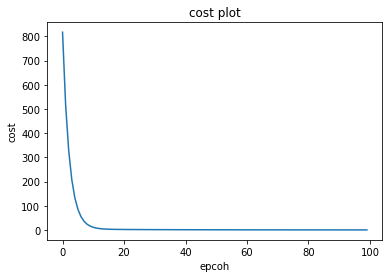

In [93]:
plt.plot(cost_list.cost)
plt.title("cost plot")
plt.xlabel("epcoh")
plt.ylabel("cost")

## Basic Neuron - solve multiple equations

Below is the generalized model for solving any number of equations. 

Try changing the number of observations (**# of rows**) in x as well as number of variables (**# of columns**) and see if you get a soluton.

Also if error is increasing with each epoc reduce the learning rate. if error decreases but does not get reach below your threshold increase the number  of epochs (**n_epochs**).

In [82]:
def nn_batch_generalized(x,y,w,lr,n_epoch):
    cost_list = []  # initialize list to store epochs and cost
    y_hat = np.dot(x,w)  # calculate y_hat for first iteration
    for epoch in range(n_epoch):  
        dcostdw = 2*0.5*np.dot(-x.T,(y-y_hat))   # notice change from previous function "nn_batch". 
                                                #  Matrix multiplication dcostdw (3x1) = tranpose(X) (3x4)  * (y - y_hat) (4x1) 
                                                # above matrix shapes correspond to below example. for other example shapes may change but this function will work withput any changes needed.
        w = w - lr*dcostdw  # w new (3x1) = w (3x1) - dcostdw (3x1)
        y_hat = np.dot(x,w) # calculate new y_hat using new weights after above steps
        cost = 0.5*np.sum((y - y_hat)**2)  # calculate new cost
        cost_list.append([epoch,cost])
        if epoch%1000==0:
            print("epoch :{:d} cost:{:f}".format(epoch,cost))
        if cost <= 0.001:
            print("epoch :{:d} cost:{:f}".format(epoch,cost))
            break

    cost_list = pd.DataFrame(cost_list,columns=['epoch','cost'])
    return w,cost_list

In [96]:
x = np.array([[3,8,10],
             [10,7,2],
             [2,9,15],
             [1,12,34],
             [3,1,9]])
y = [[51],[60],[57],[85],[22]]
w = np.ones((x.shape[1],1))
lr = 0.0001
n_epoch=10000
w,cost_list = nn_batch_generalized(x,y,w,lr,n_epoch)
print "y_hat_final:\n{:s}".format(np.dot(x,w))
print "trained weights :\n{:s}".format(w)

epoch :0 cost:2794.385632
epoch :1000 cost:0.014568
epoch :1360 cost:0.000995
y_hat_final:
[[ 50.98717107]
 [ 60.00645076]
 [ 56.98719395]
 [ 85.00357432]
 [ 22.02474432]]
trained weights :
[[ 3.00420485]
 [ 3.99435018]
 [ 1.00197551]]


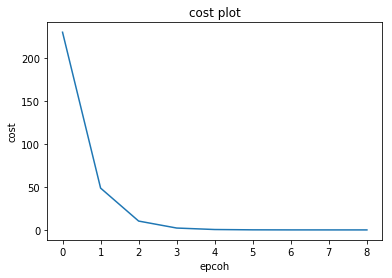

In [101]:
plt.plot(cost_list.cost)
plt.title("cost plot")
plt.xlabel("epcoh")
plt.ylabel("cost")